**Autor:** [Mario Bustillo](https://www.linkedin.com/in/mario-bustillo/)

**Fecha:** Diciembre 2024

### Contexto

Este proyecto se centra en el análisis del rendimiento de las acciones de OYO Rooms, una cadena hotelera global.Este conjunto de datos proporciona un registro detallado historico de los cambios en el precio de las acciones de OYO.

Objetivo

El objetivo principal de este proyecto es realizar análisis históricos, pronosticar el rendimiento futuro de las acciones y comprender las tendencias del mercado relacionadas con las acciones de OYO. Este análisis ayudará a tomar decisiones de inversión informadas.

Metodología:
* Cargar y Preparar los Datos: Importar los paquetes necesarios y cargar el conjunto de datos.

* Limpieza de Datos: Renombrar las columnas para mantener la consistencia y formatear la columna de fecha.

* Análisis Descriptivo: Resumir las estadísticas clave de los precios de las acciones y visualizar los precios ajustados de las acciones a lo largo del tiempo.


Contenido

* Análisis histórico
* Desarrollo y evaluación de precios en base a modelos de Deep Learning
* Forecasting para los próximos 30 días

Campos y variables

* Date: La fecha del día de negociación.
* Open: El precio de apertura de las acciones de OYO en un día determinado.
* High: El precio más alto de las acciones de OYO durante el día de negociación.
* Low: El precio más bajo de las acciones de OYO durante el día de negociación.
* Close: El precio de cierre de las acciones de OYO en un día determinado.
* Adj Close: El precio de cierre ajustado de las acciones de OYO.
* Volumen: El volumen de negociación de las acciones de OYO en un día determinado.

[Fuente: OYO](https://www.kaggle.com/datasets/mayankanand2701/oyo-stock-price-dataset/data).

# 0) Cargar Librerias 📚

In [ ]:
#!pip install -U ydata-profiling

In [ ]:
#!pip install funpymodeling

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport
from funpymodeling.exploratory import status

In [ ]:
import tensorflow as tf
#from tensorflow.keras.layers import Layer
#import swish
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, mean_squared_error
from keras import Model
from keras.layers import Input, Dense, Dropout, LSTM
#import seaborn as sns

# 1) Cargar Dataset 📕

In [ ]:
path_ddbb = "/content/drive/MyDrive/Bases de Datos/OYO Forecasting/OYO Dataset.csv"

In [ ]:
path_images = "/content/drive/MyDrive/Bases de Datos/OYO Forecasting/images/"

In [ ]:
# Carga del dataset
data = pd.read_csv(path_ddbb, sep=",")

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-04,895.0,908.0,870.0,875.0,678.447571,70300
1,2012-01-05,875.0,881.0,863.0,878.0,680.773499,46300
2,2012-01-06,870.0,877.0,855.0,870.0,674.570618,28800
3,2012-01-10,871.0,893.0,871.0,884.0,685.425781,65600
4,2012-01-11,884.0,930.0,879.0,928.0,719.541809,131100


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000,3.052000e+03
mean,1517.732962,1536.012123,1499.345020,1517.892529,1334.709510,6.238617e+04
std,391.546801,396.643987,386.950559,391.829802,425.808167,6.343266e+04
min,759.000000,767.000000,743.000000,763.000000,591.606079,0.000000e+00
25%,1241.750000,1258.750000,1227.750000,1244.000000,1097.445160,3.190000e+04
50%,1466.000000,1479.000000,1450.000000,1466.000000,1248.018371,4.930000e+04
75%,1721.500000,1745.000000,1705.250000,1727.000000,1429.023407,7.450000e+04
max,2800.000000,2845.000000,2785.000000,2817.000000,2771.138672,1.751800e+06


In [ ]:
# Tamaño del dataset
data.shape

(3052, 7)

# 2) Exploración del Dataset 🔍

## 2.1 Procesamiento del Dataset ⚙️

Eliminamos las columnas de "Adj Close" y "Volume" porque no son de interés

In [ ]:
# Eliminación de columnas no necesarias para el análisis
data = data.drop(['Adj Close', 'Volume'], axis=1)

In [ ]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Date,0,0.0,0,0.0,3052,object
1,Open,0,0.0,0,0.0,1242,float64
2,High,0,0.0,0,0.0,1286,float64
3,Low,0,0.0,0,0.0,1261,float64
4,Close,0,0.0,0,0.0,1266,float64


No tenemos valores Null ni NaN, pero si tenemos que cambiar el tipo de datos de una columna.

Date lo redefinimos con formato de datetime

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
# Reordenamos los datos por fecha
data.sort_values(by='Date', ascending=True, inplace=True)
data.reset_index(drop=True, inplace=True)

## 2.2 Visualización de Gráficos 📉

In [ ]:
# Visualización de la historia de precios
fig = px.line(x=data.Date, y=data.Close)
fig.update_traces(line_color='rgba(255, 29, 6, 0.8)')
fig.update_layout(xaxis_title="Fecha",
                  yaxis_title="Precio",
                  title={'text': "Datos históricos del precio de las acciones de OYO", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='white')

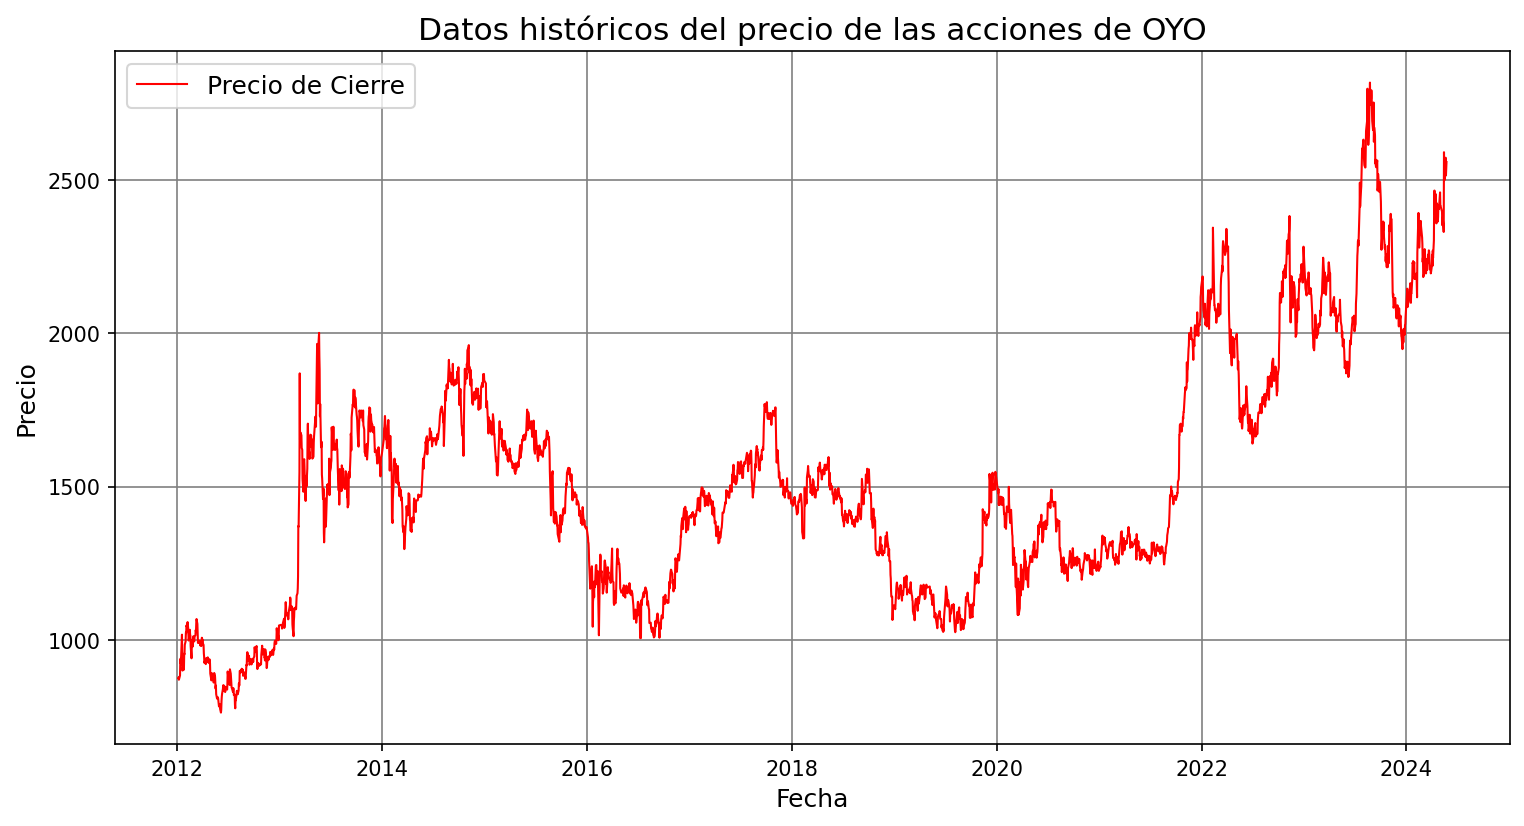

In [ ]:
# Graficar la evolución de los precios de apertura y cierre del mercado por fecha
plt.figure(figsize=(12, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='black')
plt.plot(data.Date, data.Close, color='red', lw=1, label='Precio de Cierre')
plt.title('Datos históricos del precio de las acciones de OYO', fontsize=15)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.legend(loc='upper left', prop={'size': 12})
plt.grid(color='gray')

# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_1.png', dpi=300, bbox_inches='tight')

plt.show()

**Figura 1:** Datos históricos del precio de las acciones de OYO

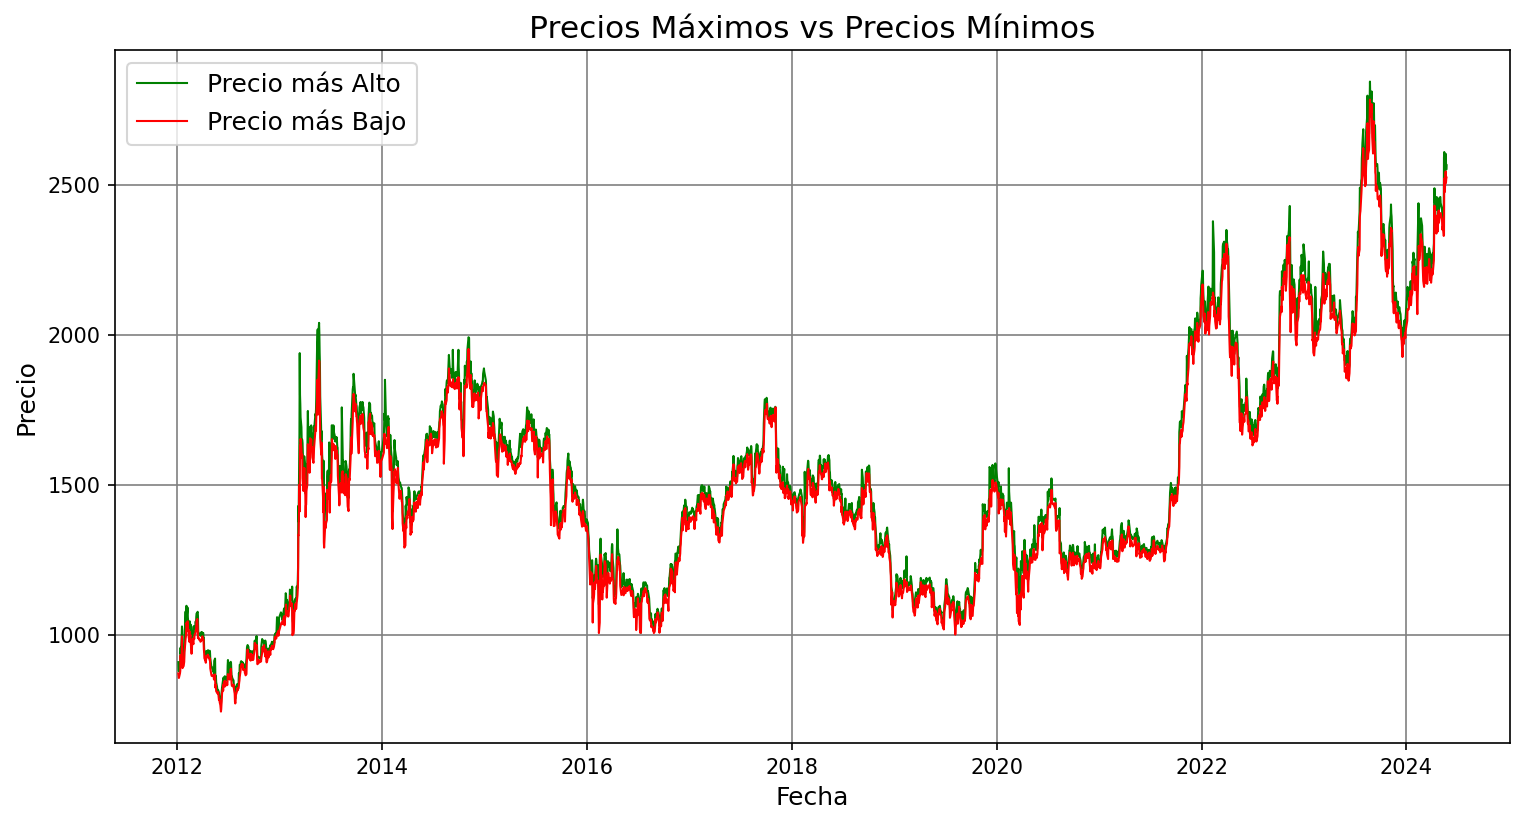

In [ ]:
# Graficar los precios maximos y minimos respecto a la fecha
plt.figure(figsize=(12, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='black')
plt.plot(data.Date, data.High, color='green', lw=1, label='Precio más Alto')
plt.plot(data.Date, data.Low, color='red', lw=1, label='Precio más Bajo')
plt.title('Precios Máximos vs Precios Mínimos', fontsize=15)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.legend(loc='upper left', prop={'size': 12})
plt.grid(color='gray')

# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_2.png', dpi=300, bbox_inches='tight')

plt.show()

**Figura 2:** Evolución de los Precios Máximos vs Precios Mínimos

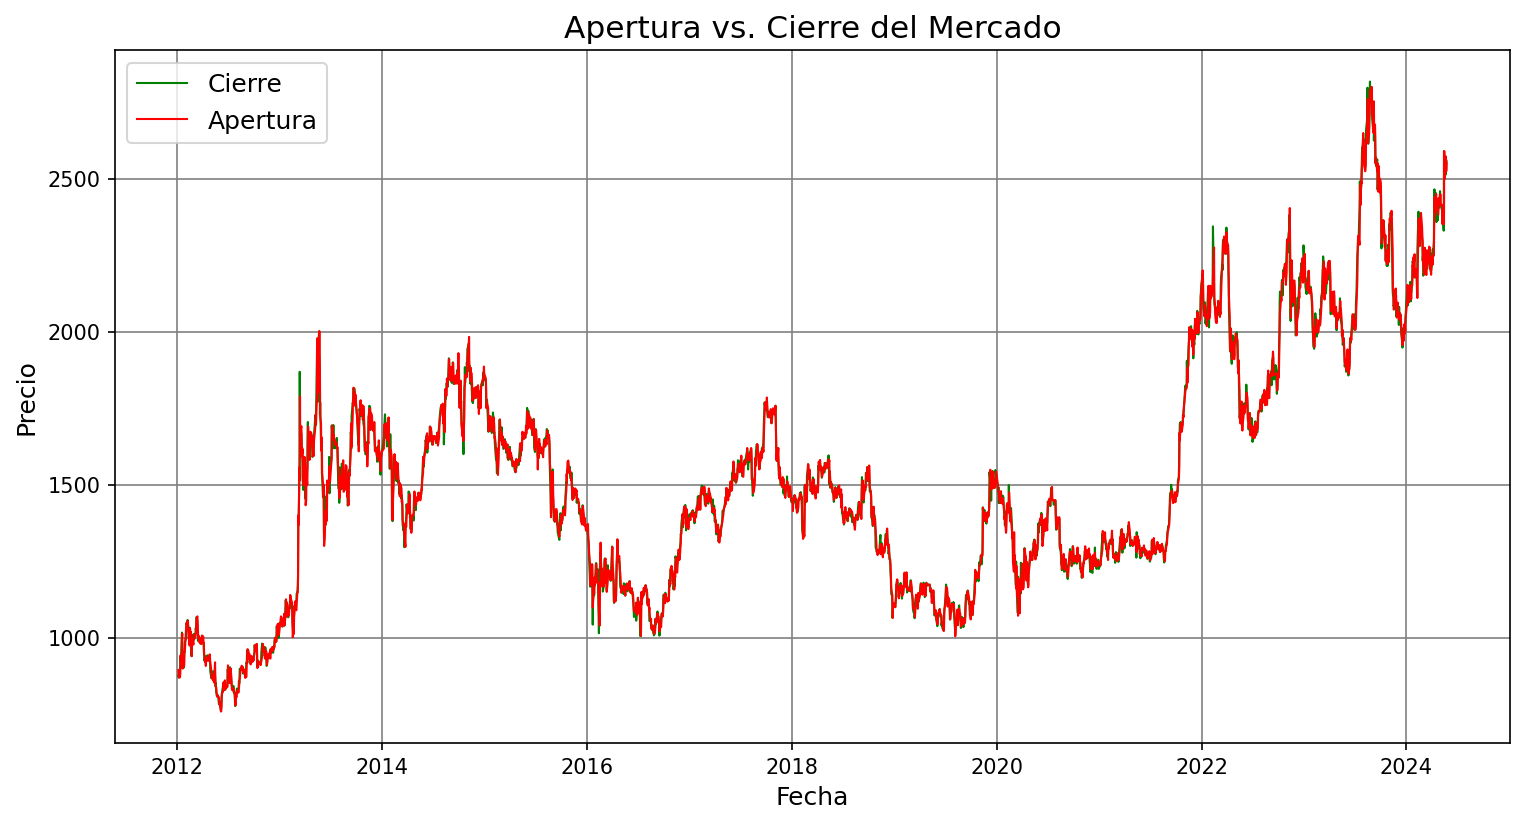

In [ ]:
# Graficar la evolución de los precios de apertura y cierre del mercado por fecha
plt.figure(figsize=(12, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='black')
plt.plot(data.Date, data.Close, color='green', lw=1, label='Cierre')
plt.plot(data.Date, data.Open, color='red', lw=1, label='Apertura')
plt.title('Apertura vs. Cierre del Mercado', fontsize=15)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.legend(loc='upper left', prop={'size': 12})
plt.grid(color='gray')

# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_3.png', dpi=300, bbox_inches='tight')

plt.show()

**Figura 3:** Evolución de los Apertura vs. Cierre del Mercado

# 3) Preparar los dataset 🧮

Seleccionar solo las columnas relevantes para el análisis, solo las columnas de "Date" y "Close" (Fecha y Precio de Cierre).

In [ ]:
data_model = data.copy()
data_model = data_model[["Date","Close"]]

Establecer la columna 'Date' como índice temporal para facilitar el análisis temporal de las acciones.

In [ ]:
data_model.index = data_model["Date"]
data_model.drop("Date",axis=1,inplace=True)

In [ ]:
data_model.head()

,Close
Date,
2012-01-04,875.0
2012-01-05,878.0
2012-01-06,870.0
2012-01-10,884.0
2012-01-11,928.0


In [ ]:
# Normalización de los datos de entrenamiento y prueba. Los valores quedan entre 0 y 1
scaler_train = MinMaxScaler(feature_range=(0,1))
scaler_test = MinMaxScaler(feature_range=(0,1))

## Definición del tamaño del conjunto de prueba

In [ ]:
test_size = 0.2 # Propoción de 80% train y 20% test

In [ ]:
# Dividimos datos en los dataset de Train y Test
def split_data(data,test_size):
    pos = int(round(len(data)*(1-test_size)))
    train = data[:pos]
    test = data[pos:]
    return train , test , pos

In [ ]:
data_df = data_model.values # Extraemos los valores en un vector

In [ ]:
# Dividimos y escalamos los datos
data_train , data_test , pos = split_data(data_df,test_size)

In [ ]:
data_train = scaler_train.fit_transform(data_train)
data_test = scaler_test.fit_transform(data_test)

In [ ]:
print(data_train.shape , data_test.shape)

(2442, 1) (610, 1)


## Adaptación para modelos de Deep Learning

In [ ]:
# 'lb' es el tamaño de la ventana para el modelo LSTM (60 días previos para predecir el siguiente)
lb = 60

In [ ]:
# Función para crear las características (X) y las etiquetas (Y) para el modelo LSTM
def create_features(data,lb):
    X,Y = [],[]
    for i in range(lb,len(data)):
        X.append(data[i-lb:i,0])
        Y.append(data[i,0])

    return np.array(X),np.array(Y)

In [ ]:
# Creamos las características y etiquetas para los conjuntos de entrenamiento y prueba
X_train , Y_train = create_features(data_train,lb)
X_test , Y_test = create_features(data_test,lb)

In [ ]:
print(f"X Train Shape : {X_train.shape}\nY Train Shape : {Y_train.shape}\nX Test Shape : {X_test.shape}\nY Test Shape : {Y_test.shape}")

X Train Shape : (2382, 60)
Y Train Shape : (2382,)
X Test Shape : (550, 60)
Y Test Shape : (550,)


In [ ]:
# Ajustamos las dimensiones para la entrada del modelo LSTM
X_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

# Redefinimos las etiquetas Y para ser unidimensionales
Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

In [ ]:
print(f"X Train Shape : {X_train.shape}\nY Train Shape : {Y_train.shape}\nX Test Shape : {X_test.shape}\nY Test Shape : {Y_test.shape}")

X Train Shape : (2382, 1, 60)
Y Train Shape : (2382, 1)
X Test Shape : (550, 1, 60)
Y Test Shape : (550, 1)


# 4) Evaluación de Modelos 🎯

## 4.1) Modelo LSTM 🚀

**LSTM Model:**

Este modelo es ideal para secuencias temporales, como predicción de precios de acciones o cualquier tarea que implique series temporales.

### Crear Modelo LSTM

Creamos una copia de los array de datos

In [ ]:
X_train_LSTM = X_train.copy()
X_test_LSTM = X_test.copy()


Y_train_LSTM = Y_train.copy()
Y_test_LSTM = Y_test.copy()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM , Dropout, Layer
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping

In [ ]:
# Creación del modelo LSTM
LSTM_model = Sequential()
LSTM_model.add(LSTM(units=100,
         activation='relu',
         input_shape=(X_train_LSTM.shape[1],lb)))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
# Resumen del modelo
LSTM_model.summary()

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                       │ (None, 100)                 │          64,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,501 (251.96 KB)

 Trainable params: 64,501 (251.96 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilamos el modelo con la función de pérdida y el optimizador
LSTM_model.compile(loss='mean_squared_error',optimizer='adam')

### Entrenar Modelo LSTM

In [ ]:
# Callbacks para detener el entrenamiento temprano y guardar el mejor modelo
callbacks_LSTM = [EarlyStopping(monitor='val_loss',patience=3,verbose=1,mode='min'),
            ModelCheckpoint(filepath='mymodel.keras',monitor='val_loss',mode='min',
                           save_best_only=True,save_weights_only=False,verbose=1)]

In [ ]:
# Entrenamiento del modelo
history_LSTM = LSTM_model.fit(x=X_train_LSTM,
                   y=Y_train_LSTM,
                   epochs=100,
                   batch_size=32,
                   validation_data=(X_test_LSTM,Y_test_LSTM),
                   callbacks = callbacks_LSTM,
                   shuffle=False)

Epoch 1/100
68/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0186
Epoch 1: val_loss improved from inf to 0.02025, saving model to mymodel.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0182 - val_loss: 0.0202
Epoch 2/100
68/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0190
Epoch 2: val_loss improved from 0.02025 to 0.01539, saving model to mymodel.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0185 - val_loss: 0.0154
Epoch 3/100
67/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131
Epoch 3: val_loss improved from 0.01539 to 0.01222, saving model to mymodel.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127 - val_loss: 0.0122
Epoch 4/100
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0102
Epoch 4: val_loss improved from 0.01222 to 0.01024, saving model to mymodel.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0102 - val_loss: 0.0102
Epoch 5/100
71/75 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0096
Epoch 5: val_loss improved from 0.01024 to 0.00925,

### Gráficos

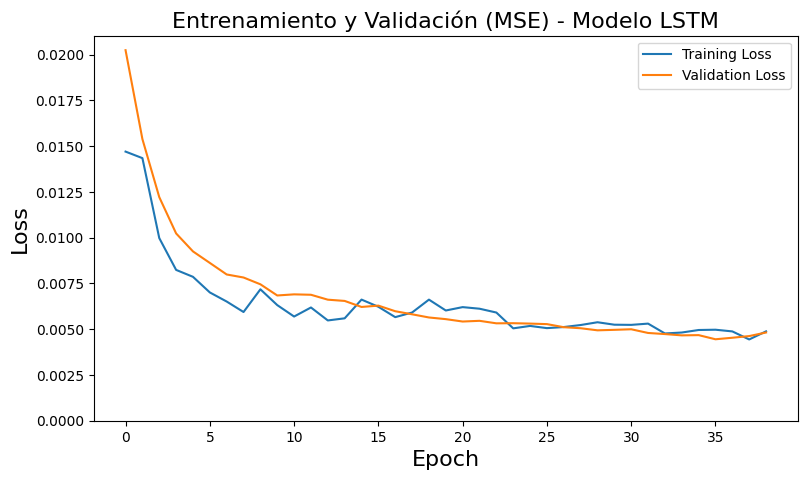

In [ ]:
# Gráfica de la pérdida de entrenamiento y validación
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(history_LSTM.history["loss"],label='Training Loss')
plt.plot(history_LSTM.history["val_loss"],label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Entrenamiento y Validación (MSE) - Modelo LSTM',fontsize=16)

# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_4.png', dpi=300, bbox_inches='tight')

plt.show()

**Figura 4:** Entrenamiento y Validación (MSE) del modelo LSTM

### Rendimiento

In [ ]:
# Evaluación del modelo en el conjunto de prueba
LSTM_loss=LSTM_model.evaluate(X_test_LSTM,Y_test_LSTM,batch_size=32)
print("Test Loss(MSE) : %.2f%%"% (100*LSTM_loss))

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061 
Test Loss(MSE) : 0.48%


In [ ]:
# Predicciones de entrenamiento y prueba
train_predict_LSTM = LSTM_model.predict(X_train_LSTM)
test_predict_LSTM = LSTM_model.predict(X_test_LSTM)

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
# Invertimos las PREDICCIONES a la escala original -> Pasamos de 0 y 1 a valores continuos
train_predict_LSTM = scaler_train.inverse_transform(train_predict_LSTM) # Y_train_predict
test_predict_LSTM = scaler_test.inverse_transform(test_predict_LSTM) # Y_test_predict

In [ ]:
# Invertimos la DATA ORIGINAL a la escala original
Y_train_LSTM = scaler_train.inverse_transform(Y_train_LSTM)
Y_test_LSTM = scaler_test.inverse_transform(Y_test_LSTM)

Cálculo de Error y Rendimiento

In [ ]:
# Cálculo del RMSE (Raíz del Error Cuadrático Medio)
train_rmse = np.sqrt(mean_squared_error(Y_train_LSTM,train_predict_LSTM))
test_rmse = np.sqrt(mean_squared_error(Y_test_LSTM,test_predict_LSTM))

In [ ]:
print(f"RMSE de Train : {train_rmse:.4f}")
print(f"RMSE de Test: {test_rmse:.4f}")

RMSE de Train : 71.5570
RMSE de Test: 81.7244


In [ ]:
MAPE = mean_absolute_percentage_error(Y_test_LSTM, test_predict_LSTM)
Accuracy = 1 - MAPE
print("MAPE: ", MAPE)
print("Accuracy: ", Accuracy)

MAPE:  0.030465743101502088
Accuracy:  0.9695342568984979


### Graficar Predicciones

In [ ]:
# Añadir las PREDICCIONES DE TRAIN del modelo
train_prediction_df_LSTM = data_model[lb:pos]
train_prediction_df_LSTM["Predicted"] = train_predict_LSTM
train_prediction_df_LSTM.head()

<ipython-input-1333-4af4cbe228f1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close,Predicted
Date,,
2012-03-30,1002.0,1068.993164
2012-04-02,983.0,1069.981812
2012-04-03,983.0,1066.310181
2012-04-04,956.0,1066.261963
2012-04-05,945.0,1058.156860


In [ ]:
# Añadir las PREDICCIONES DE TEST del modelo
test_prediction_df_LSTM = data_model[pos+lb:]
test_prediction_df_LSTM["Predicted"] = test_predict_LSTM
test_prediction_df_LSTM.head()

<ipython-input-1334-aac753b199b4>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close,Predicted
Date,,
2022-02-24,2065.0,2147.984131
2022-02-25,2078.0,2143.318848
2022-02-28,2085.0,2144.556396
2022-03-01,2096.0,2141.691162
2022-03-02,2055.0,2144.673828


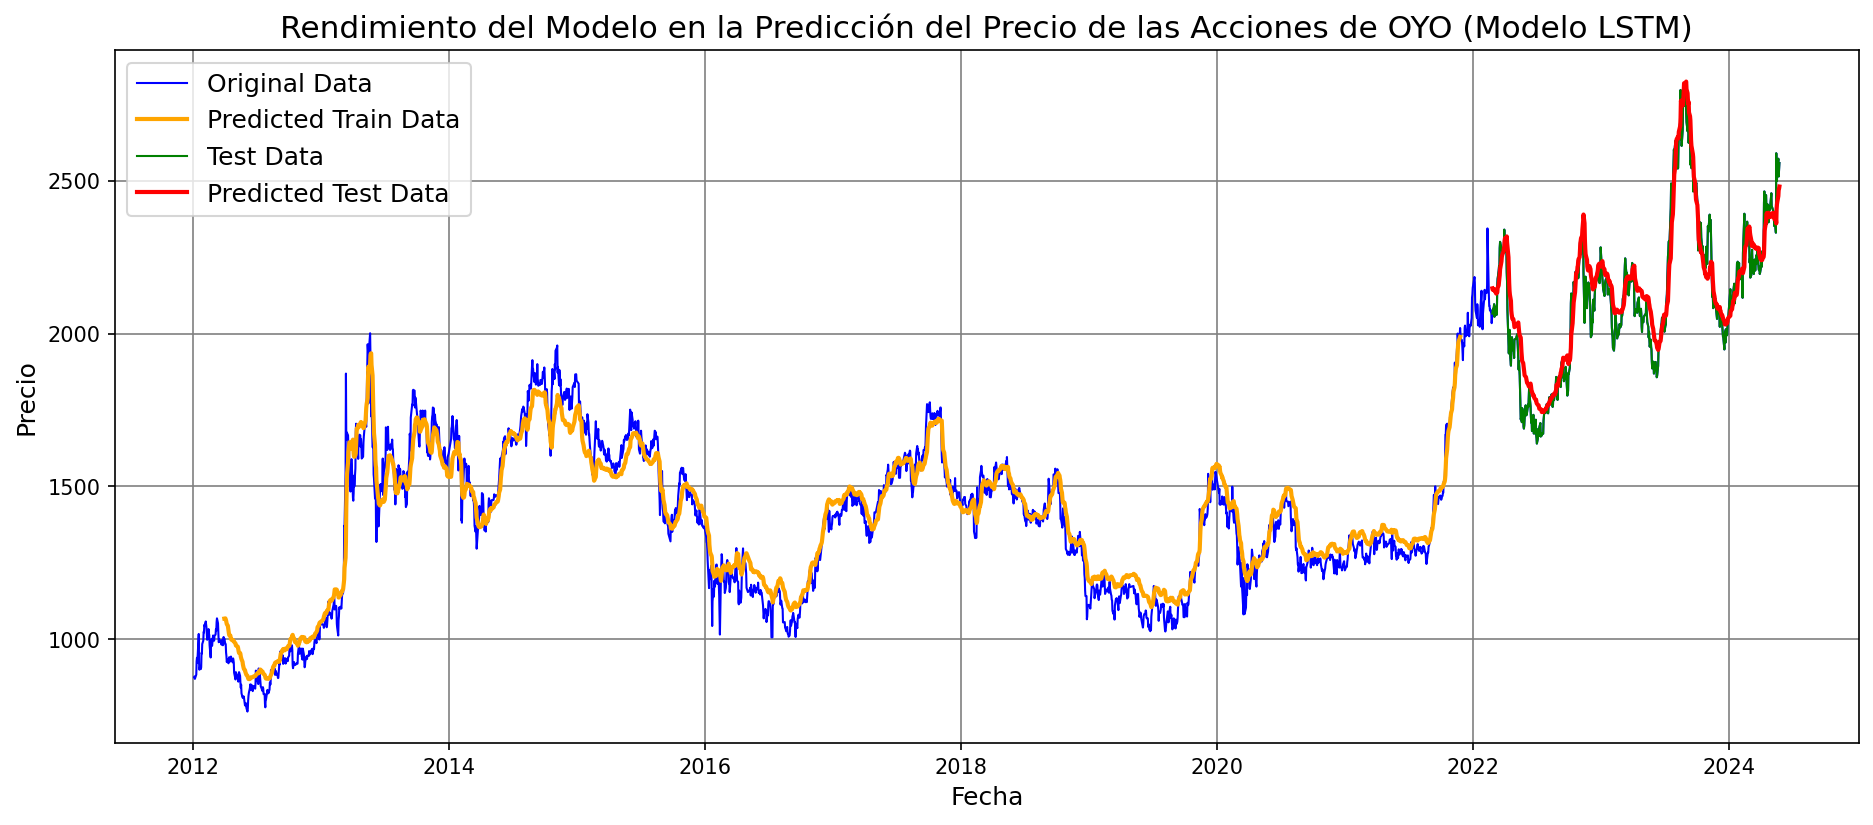

In [ ]:
# Visualización de las predicciones vs datos reales
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='black')
plt.plot(data_model.index, data_model.Close, color='blue', lw=1, label="Original Data")
plt.plot(train_prediction_df_LSTM.index, train_prediction_df.Predicted, color='orange', lw=2, label="Predicted Train Data")
plt.plot(test_prediction_df_LSTM.index, test_prediction_df_LSTM.Close, color='green', lw=1, label="Test Data")
plt.plot(test_prediction_df_LSTM.index, test_prediction_df_LSTM.Predicted, color='red', lw=2, label="Predicted Test Data")
plt.title('Rendimiento del Modelo en la Predicción del Precio de las Acciones de OYO (Modelo LSTM)', fontsize=15)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.legend(loc='upper left', prop={'size': 12})
plt.grid(color='gray')

# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_5.png', dpi=300, bbox_inches='tight')

plt.show()

**Figura 5:** Rendimiento del Modelo en la Predicción del Precio de las Acciones de OYO (Modelo LSTM)

## 4.2) Modelo GRU 🚀

**GRU Model**

Es adecuado para trabajar con datos secuenciales y tiene una estructura más sencilla. Es una variante del LSTM que usa un mecanismo de puertas similar, pero con menos parámetros.

### Crear Modelo

Creamos una copia de los array de datos

In [ ]:
X_train_GRU = X_train.copy()
X_test_GRU = X_test.copy()


Y_train_GRU = Y_train.copy()
Y_test_GRU = Y_test.copy()

In [ ]:
from tensorflow.keras.layers import GRU

In [ ]:
# Crear modelo GRU
GRU_model = Sequential()
GRU_model.add(GRU(units=100, activation='relu', input_shape=(X_train_GRU.shape[1], lb)))
GRU_model.add(Dropout(0.2))
GRU_model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
# Resumen del modelo
GRU_model.summary()

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_15 (GRU)                         │ (None, 100)                 │          48,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,701 (190.24 KB)

 Trainable params: 48,701 (190.24 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilamos el modelo
GRU_model.compile(loss='mean_squared_error', optimizer='adam')

#### Entrenar modelo GRU

In [ ]:
# Callbacks para detener el entrenamiento temprano y guardar el mejor modelo
callbacks_GRU = [EarlyStopping(monitor='val_loss',patience=3,verbose=1,mode='min'),
            ModelCheckpoint(filepath='mymodel.keras',monitor='val_loss',mode='min',
                           save_best_only=True,save_weights_only=False,verbose=1)]

In [ ]:
# Entrenamos el modelo
history_GRU = GRU_model.fit(X_train_GRU, Y_train_GRU,
                            epochs=100,
                            batch_size=32,
                            validation_data=(X_test_GRU, Y_test_GRU),
                            callbacks=callbacks_GRU,
                            shuffle=False)

Epoch 1/100
65/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0303
Epoch 1: val_loss improved from inf to 0.02130, saving model to mymodel.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0292 - val_loss: 0.0213
Epoch 2/100
65/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0170
Epoch 2: val_loss improved from 0.02130 to 0.01382, saving model to mymodel.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0165 - val_loss: 0.0138
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0140
Epoch 3: val_loss improved from 0.01382 to 0.01026, saving model to mymodel.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0140 - val_loss: 0.0103
Epoch 4/100
68/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0099
Epoch 4: val_loss improved from 0.01026 to 0.00889, saving model to mymodel.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - val_loss: 0.0089
Epoch 5/100
66/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0095
Epoch 5: val_loss improved from 0.00889 to 0.00790, sa

### Rendimiento

In [ ]:
# Evaluamos el modelo en el conjunto de test
GRU_loss = GRU_model.evaluate(X_test_GRU, Y_test_GRU, batch_size=32)
print(f"Test Loss (GRU) : {GRU_loss:.2f}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0091 
Test Loss (GRU) : 0.01


In [ ]:
# Predicciones de entrenamiento y prueba
train_predict_GRU = GRU_model.predict(X_train_GRU)
test_predict_GRU = GRU_model.predict(X_test_GRU)

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
# Invertimos las PREDICCIONES a la escala original -> Pasamos de 0 y 1 a valores continuos
train_predict_GRU = scaler_train.inverse_transform(train_predict_GRU) # Y_train_predict
test_predict_GRU = scaler_test.inverse_transform(test_predict_GRU) # Y_test_predict

In [ ]:
# Invertimos la DATA ORIGINAL a la escala original
Y_train_GRU = scaler_train.inverse_transform(Y_train_GRU)
Y_test_GRU = scaler_test.inverse_transform(Y_test_GRU)

Cálculo de Error y Rendimiento

In [ ]:
# Cálculo del RMSE (Raíz del Error Cuadrático Medio)
train_rmse_GRU = np.sqrt(mean_squared_error(Y_train_GRU,train_predict_GRU))
test_rmse_GRU = np.sqrt(mean_squared_error(Y_test_GRU,test_predict_GRU))

In [ ]:
print(f"RMSE de Train : {train_rmse_GRU:.4f}")
print(f"RMSE de Test: {test_rmse_GRU:.4f}")

RMSE de Train : 74.0737
RMSE de Test: 100.0116


In [ ]:
MAPE = mean_absolute_percentage_error(Y_test_GRU, test_predict_GRU)
Accuracy = 1 - MAPE
print("MAPE: ", MAPE)
print("Accuracy: ", Accuracy)

MAPE:  0.03822236971444812
Accuracy:  0.9617776302855519


### Gráficos

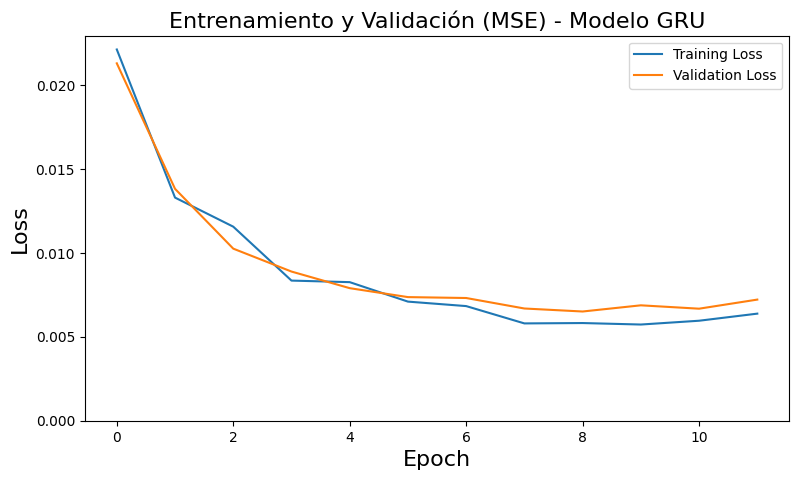

In [ ]:
# Gráfica de la pérdida de entrenamiento y validación
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(history_GRU.history["loss"],label='Training Loss')
plt.plot(history_GRU.history["val_loss"],label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Entrenamiento y Validación (MSE) - Modelo GRU',fontsize=16)

# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_6.png', dpi=300, bbox_inches='tight')

plt.show()

**Figura 6:** Entrenamiento y Validación (MSE) del modelo GRU

### Graficar Predicciones

In [ ]:
# Añadir las PREDICCIONES DE TRAIN del modelo
train_prediction_df_GRU = data_model[lb:pos]
train_prediction_df_GRU["Predicted"] = train_predict_GRU
train_prediction_df_GRU.head()

<ipython-input-1354-3f8b25f378ac>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close,Predicted
Date,,
2012-03-30,1002.0,1089.050903
2012-04-02,983.0,1091.114868
2012-04-03,983.0,1092.863281
2012-04-04,956.0,1088.706177
2012-04-05,945.0,1084.743896


In [ ]:
# Añadir las PREDICCIONES DE TEST del modelo
test_prediction_df_GRU = data_model[pos+lb:]
test_prediction_df_GRU["Predicted"] = test_predict_GRU
test_prediction_df_GRU.head()

<ipython-input-1355-cdeb99742e02>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close,Predicted
Date,,
2022-02-24,2065.0,2187.663818
2022-02-25,2078.0,2184.129883
2022-02-28,2085.0,2177.531494
2022-03-01,2096.0,2183.673584
2022-03-02,2055.0,2182.165039


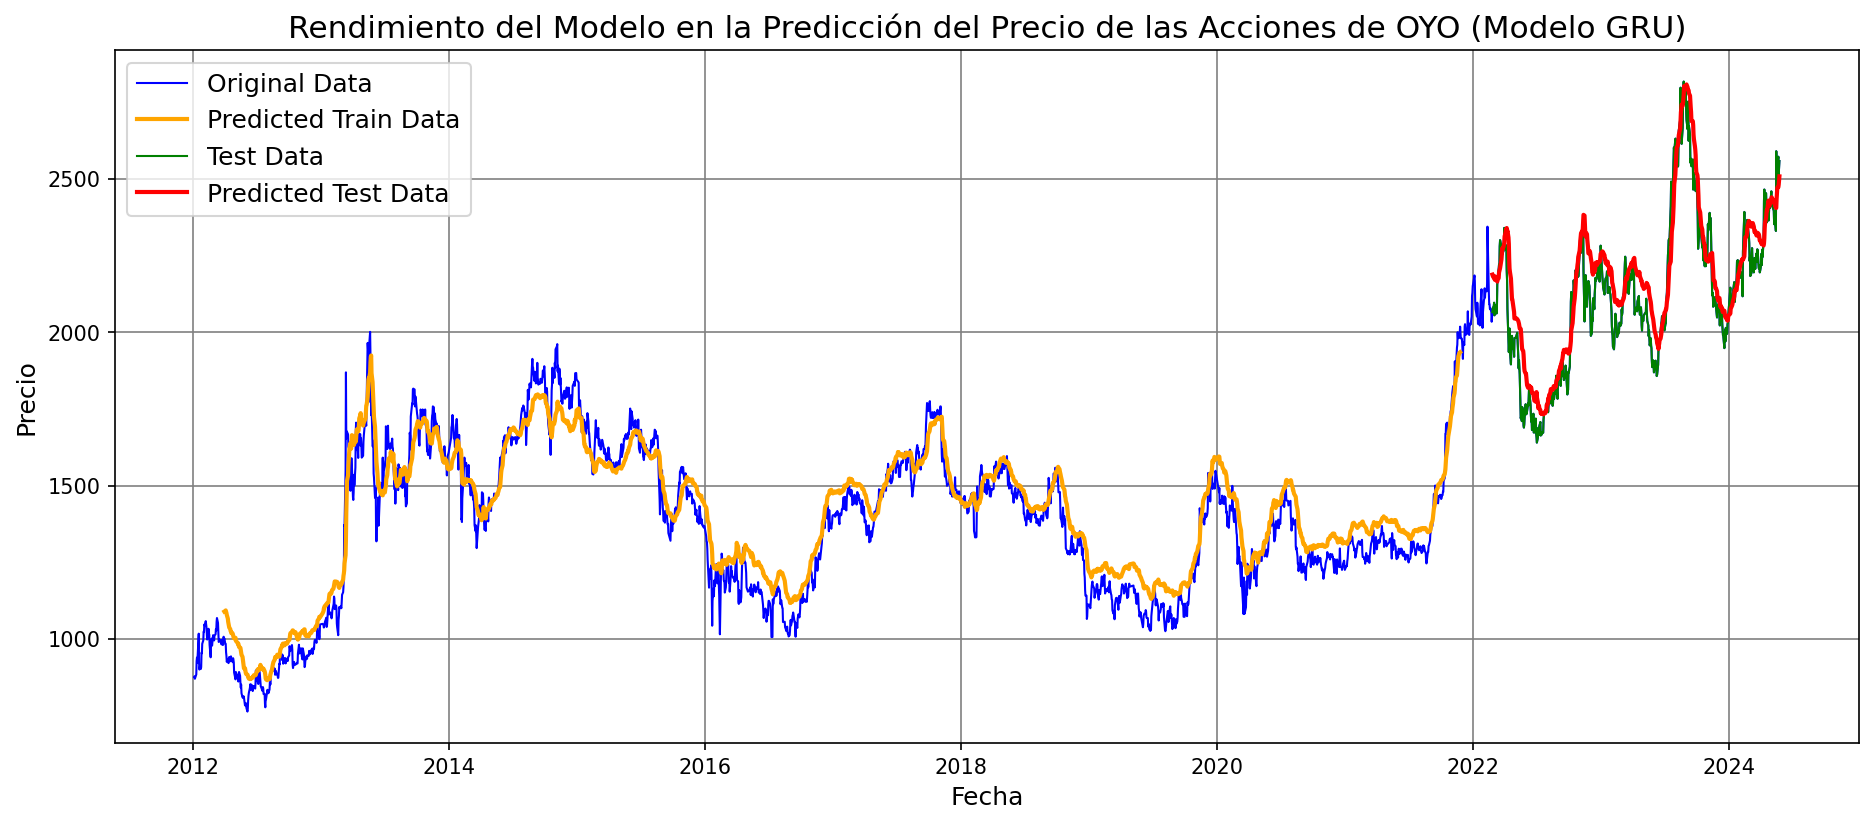

In [ ]:
# Visualización de las predicciones vs datos reales
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='black')
plt.plot(data_model.index, data_model.Close, color='blue', lw=1, label="Original Data")
plt.plot(train_prediction_df_GRU.index, train_prediction_df_GRU.Predicted, color='orange', lw=2, label="Predicted Train Data")
plt.plot(test_prediction_df_GRU.index, test_prediction_df_GRU.Close, color='green', lw=1, label="Test Data")
plt.plot(test_prediction_df_GRU.index, test_prediction_df_GRU.Predicted, color='red', lw=2, label="Predicted Test Data")
plt.title('Rendimiento del Modelo en la Predicción del Precio de las Acciones de OYO (Modelo GRU)', fontsize=15)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.legend(loc='upper left', prop={'size': 12})
plt.grid(color='gray')

# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_7.png', dpi=300, bbox_inches='tight')

plt.show()

**Figura 7:** Rendimiento del Modelo en la Predicción del Precio de las Acciones de OYO (Modelo GRU)

## 4.3) Comparaciones de Modelos ✅

Una vez entrenados los modelos, se comparan el rendimiento de cada uno usando las métricas como RMSE y Accuracy (o MAPE).

In [ ]:
# Comparar RMSE de todos los modelos
print(f"LSTM RMSE de Test: {test_rmse:.4f}")
print(f"GRU RMSE de Test: {test_rmse_GRU:.4f}")

LSTM RMSE de Test: 81.7244
GRU RMSE de Test: 100.0116


En este caso el mejor modelo es el LSTM al **tener un menor RMSE**. Por lo que lo **seleccionamos el Modelo LSTM para hacer el forecasting** de nuestro dataset.

# 5) Predicciones a Corto Plazo 📈

A partir del modelo LSTM hacemos las predicciones de los precios de cierre (Close)

In [ ]:
# Predicción futura para los próximos 30 días
future_days = 30

In [ ]:
# Tomamos los últimos 60 días de datos del conjunto de test
last_data = data_test[-lb:]

In [ ]:
# Creamos un array vacío donde se almacenarán las predicciones de los próximos future_days días
predictions = []

In [ ]:
# Hacemos las predicciones de los próximos future_days días
for i in range(future_days):
    # Predecimos el siguiente valor
    pred = LSTM_model.predict(last_data.reshape(1, 1, lb))

    # Guardamos la predicción
    predictions.append(pred[0, 0])

    # Actualizamos last_data, añadiendo la predicción y eliminando el primer valor (ventana deslizante)
    last_data = np.append(last_data[1:], pred, axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

In [ ]:
# Invertimos las predicciones a la escala original
predictions = scaler_test.inverse_transform(np.array(predictions).reshape(-1, 1))

In [ ]:
# Generamos un índice de fechas para los próximos 30 días
last_date = data['Date'].iloc[-1]
future_dates = pd.date_range(last_date, periods=(future_days+1), freq='D')[1:]  # Excluimos la última fecha (ya incluida)

# Creamos un DataFrame para las predicciones
future_predictions_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted': predictions.flatten()
})

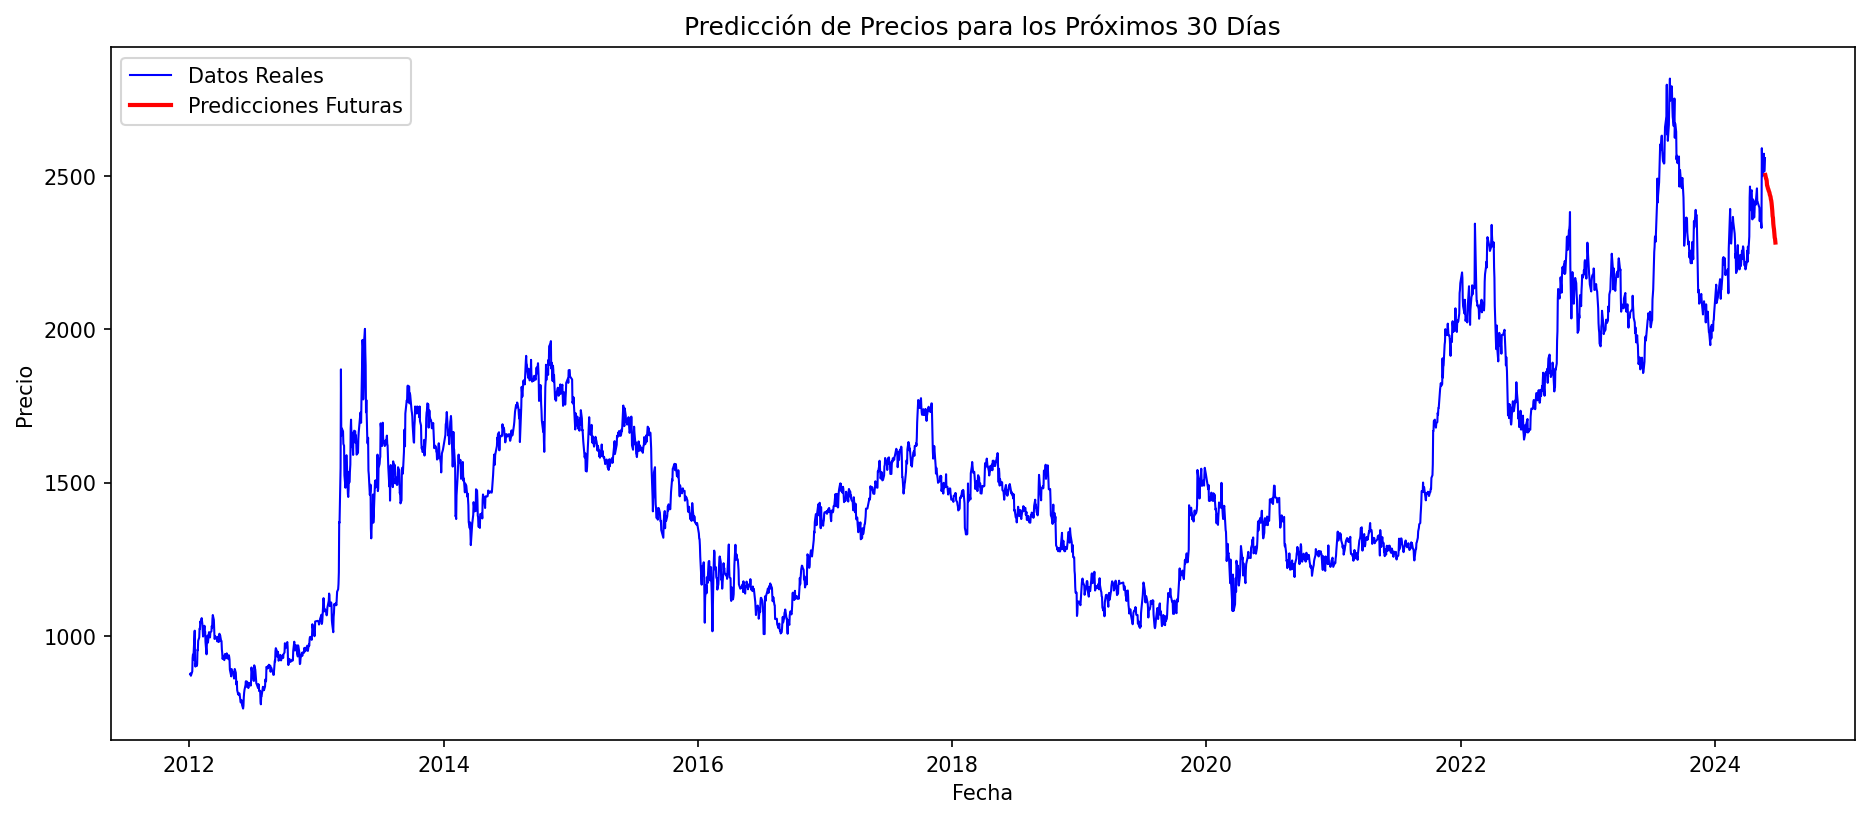

In [ ]:
# Visualizar predicciones de los próximos días
tittle = 'Predicción de Precios para los Próximos ' + str(future_days)+ ' Días'
plt.figure(figsize=(15, 6), dpi=150)
plt.plot(data['Date'], data['Close'], label='Datos Reales', color='blue', lw=1)
plt.plot(future_predictions_df['Date'], future_predictions_df['Predicted'], label='Predicciones Futuras', color='red', lw=2)
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title(tittle)
plt.legend()

# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_8.png', dpi=300, bbox_inches='tight')

plt.show()

**Figura 8:** Predicción de Precios para los Próximos 30 Días

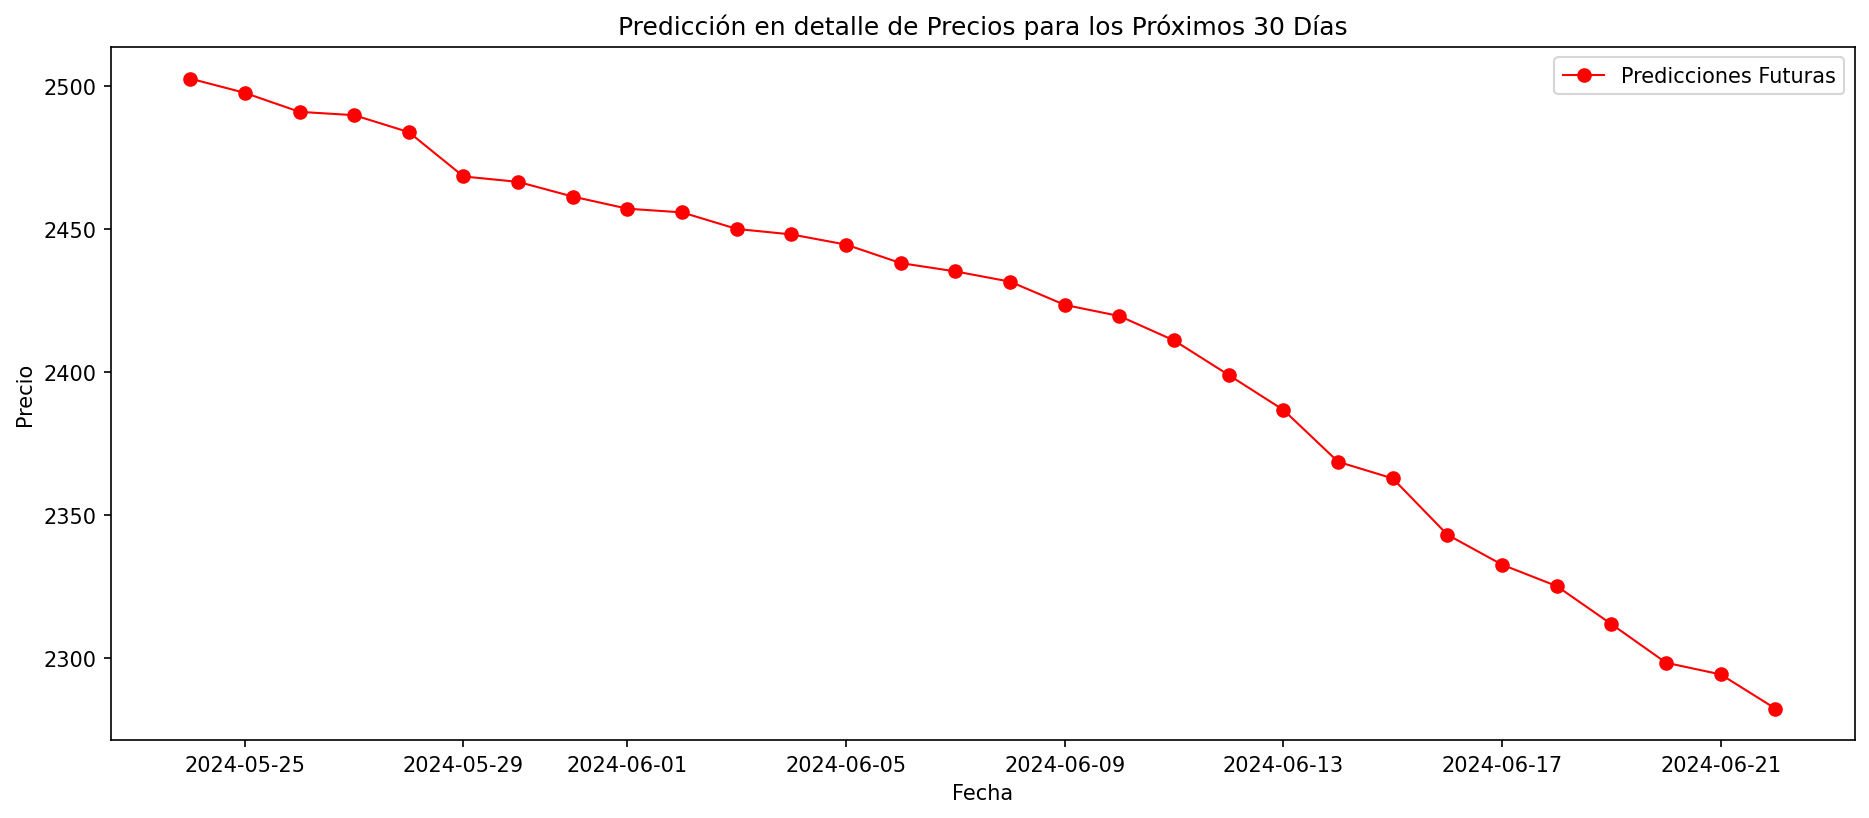

In [ ]:
# Visualización en detalle
tittle = 'Predicción en detalle de Precios para los Próximos ' + str(future_days)+ ' Días'
plt.figure(figsize=(15, 6), dpi=150)
#plt.plot(data['Date'], data['Close'], label='Datos Reales', color='blue')
plt.plot(future_predictions_df['Date'], future_predictions_df['Predicted'], marker='o', label='Predicciones Futuras', color='red', lw=1)
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title(tittle)
plt.legend()

# Guardar el gráfico en un archivo
#plt.savefig(path_images+'fig_9.png', dpi=300, bbox_inches='tight')

plt.show()

**Figura 9:** Predicción en detalle de Precios para los Próximos 30 Días

In [ ]:
# Mostrar las predicciones
future_predictions_df.head(future_days)

,Date,Predicted
0,2024-05-24,2502.745850
1,2024-05-25,2497.753418
2,2024-05-26,2491.110840
3,2024-05-27,2489.948242
4,2024-05-28,2484.009033
5,2024-05-29,2468.512695
6,2024-05-30,2466.616699
7,2024-05-31,2461.474609
8,2024-06-01,2457.235840
9,2024-06-02,2455.939453
